In [3]:
from tensorflow.keras.datasets import imdb
import tensorflow as ts

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
network.add(layers.Dense(16, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid'))
network.compile(optimizer = 'rmsprop', 
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])


C:\Users\Lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from sklearn.model_selection import train_test_split
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

In [7]:
class myCallback(ts.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.9):
            print('\nReached 90% accuracy so cancelling training!')
            self.model.stop_training = True
            
            
net = network.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.7349 - loss: 0.5632 - val_accuracy: 0.8758 - val_loss: 0.3467
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9032 - loss: 0.2869 - val_accuracy: 0.8866 - val_loss: 0.2915
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9211 - loss: 0.2204 - val_accuracy: 0.8861 - val_loss: 0.2844
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9382 - loss: 0.1777 - val_accuracy: 0.8830 - val_loss: 0.2941
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9481 - loss: 0.1541 - val_accuracy: 0.8805 - val_loss: 0.3036
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9528 - loss: 0.1399 - val_accuracy: 0.8784 - val_loss: 0.3216
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9614 - loss: 0.1223 - val_accuracy: 0.8762 - val_loss: 0.3406
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9585 - loss: 0.1165 - val_accuracy: 0.8638 - 

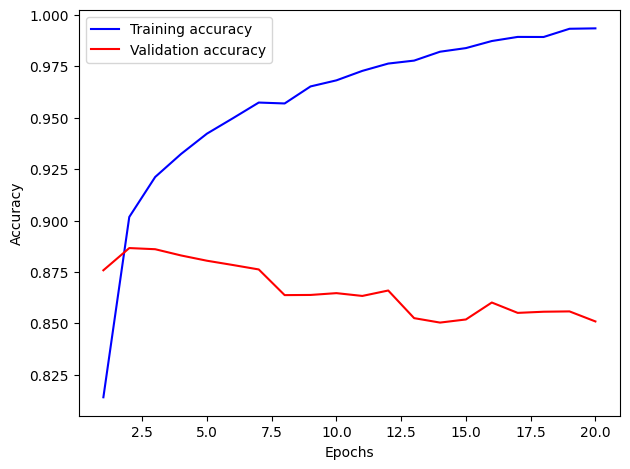

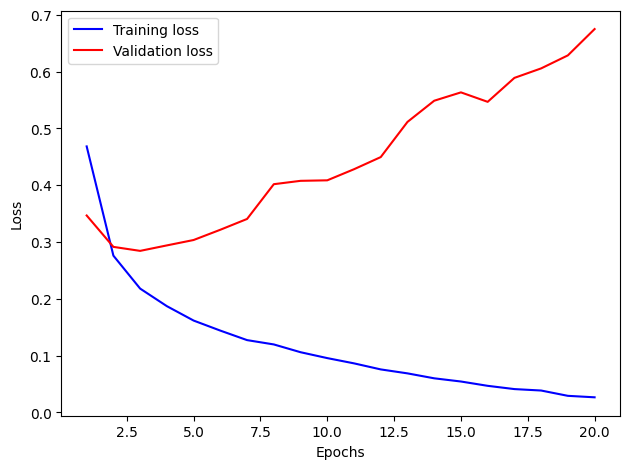

In [8]:
import matplotlib.pyplot as plt

history_dict = net.history
history_dict.keys()


plt.plot(range(1, len(history_dict['accuracy']) + 1), history_dict['accuracy'], 'b', label = 'Training accuracy')
plt.plot(range(1, len(history_dict['val_accuracy']) + 1), history_dict['val_accuracy'], 'r', label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(range(1, len(history_dict['loss']) + 1), history_dict['loss'], 'b', label = 'Training loss')
plt.plot(range(1, len(history_dict['val_loss']) + 1), history_dict['val_loss'], 'r', label = 'Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_loss:', test_loss)
print('test_acc:', test_acc)


391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.6231
test_loss: 0.6295562982559204
test_acc: 0.8561599850654602
